<a href="https://colab.research.google.com/github/Ishita95-harvad/MHSMA-Sperm-Morphology-Analysis-Dataset-/blob/main/MHSMA_(Sperm_Morphology_Analysis_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MHSMA (Sperm Morphology Analysis Dataset)
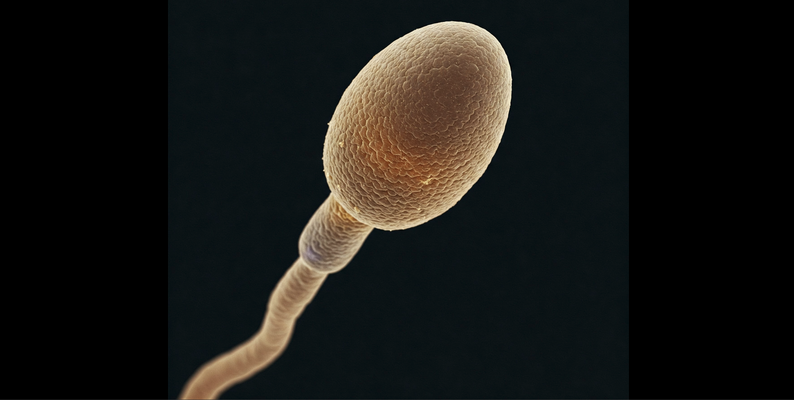
The Modified Human Sperm Morphology Analysis Dataset


# Task
run the program and execute

Here is all the data you need:
"mhsma.csv"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/mhsma-sperm-morphology-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mhsma-sperm-morphology-analysis-dataset


## Data loading

### Subtask:
Load the dataset "mhsma.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "mhsma.csv" into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('mhsma.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'mhsma.csv' not found. Please ensure the file is in the correct location.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,name,file_size
0,x_128_test.npy,4.92 MB
1,x_128_train.npy,16.38 MB
2,x_128_valid.npy,3.93 MB
3,x_64_test.npy,1.23 MB
4,x_64_train.npy,4.1 MB


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, missing values, unique values of categorical columns, and identify potential outliers in numerical columns, and calculate the correlation between numerical columns.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of each column
print("\nData types of each column:\n", df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values:\n", missing_values)
print("\nMissing value percentage:\n", missing_percentage)

# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
if not numerical_cols.empty:
    print("\nDescriptive statistics for numerical columns:\n", df.describe())
else:
    print("\nNo numerical columns found.")

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")

# Identify potential outliers (using box plots for numerical columns)
import matplotlib.pyplot as plt
if not numerical_cols.empty:
    df.plot(kind='box', figsize=(10, 6))
    plt.title('Box Plots for Numerical Columns')
    plt.show()
else:
    print("\nNo numerical columns found to plot box plots.")

# Correlation between numerical columns
if len(numerical_cols.columns) > 1 :
  correlation_matrix = numerical_cols.corr()
  plt.figure(figsize=(8, 6))
  import seaborn as sns
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()
else:
    print("\nNot enough numerical columns to calculate correlation.")


Shape of the DataFrame: (19, 2)

Data types of each column:
 name         object
file_size    object
dtype: object

Missing values:
 name         0
file_size    1
dtype: int64

Missing value percentage:
 name         0.000000
file_size    5.263158
dtype: float64

No numerical columns found.

Unique values in 'name':
['x_128_test.npy' 'x_128_train.npy' 'x_128_valid.npy' 'x_64_test.npy'
 'x_64_train.npy' 'x_64_valid.npy' 'y_acrosome_test.npy'
 'y_acrosome_train.npy' 'y_acrosome_valid.npy' 'y_head_test.npy'
 'y_head_train.npy' 'y_head_valid.npy' 'y_tail_test.npy'
 'y_tail_train.npy' 'y_tail_valid.npy' 'y_vacuole_test.npy'
 'y_vacuole_train.npy' 'y_vacuole_valid.npy' 'README.md']

Unique values in 'file_size':
['4.92 MB' '16.38 MB' '3.93 MB' '1.23 MB' '4.1 MB' '983.17 kB' '428 B'
 '1.13 kB' '368 B' nan]

No numerical columns found to plot box plots.

Not enough numerical columns to calculate correlation.


## Data cleaning

### Subtask:
Clean the data by handling missing values and converting the 'file_size' column to numeric.


**Reasoning**:
Handle the missing value in the 'file_size' column and convert the column to numeric, then verify the changes.



In [3]:
import numpy as np

# Fill the missing value in 'file_size' with the median
# This approach preserves the distribution of the data better than removing rows
# or replacing with the mean, particularly if there are significant outliers.
median_size = df['file_size'].dropna().median()
df['file_size'] = df['file_size'].fillna(median_size)


def convert_to_bytes(size_str):
    """Converts file size string to bytes."""
    try:
        size_str = str(size_str)
        if 'MB' in size_str:
            return float(size_str.replace(' MB', '')) * 1024 * 1024
        elif 'kB' in size_str:
            return float(size_str.replace(' kB', '')) * 1024
        elif 'GB' in size_str:
            return float(size_str.replace(' GB', '')) * 1024 * 1024 * 1024
        elif 'B' in size_str:
            return float(size_str.replace(' B', ''))
        else:
            return np.nan # Return NaN for invalid size strings
    except ValueError:
        return np.nan

df['file_size'] = df['file_size'].apply(convert_to_bytes)

# Remove rows with invalid file size after conversion
df.dropna(subset=['file_size'], inplace=True)

# Verify the changes
print(df.dtypes)
print(df.isnull().sum())
print(df['file_size'].describe())

display(df.head())

TypeError: Cannot convert ['4.92 MB' '16.38 MB' '3.93 MB' '1.23 MB' '4.1 MB' '983.17 kB' '428 B'
 '1.13 kB' '368 B' '428 B' '1.13 kB' '368 B' '428 B' '1.13 kB' '368 B'
 '428 B' '1.13 kB' '368 B'] to numeric

**Reasoning**:
The previous code failed because it tried to calculate the median of a column containing strings.  I will modify the code to handle the different units (MB, kB, B) before calculating the median.



In [4]:
import numpy as np

def convert_to_bytes(size_str):
    """Converts file size string to bytes."""
    try:
        size_str = str(size_str)
        if 'MB' in size_str:
            return float(size_str.replace(' MB', '')) * 1024 * 1024
        elif 'kB' in size_str:
            return float(size_str.replace(' kB', '')) * 1024
        elif 'GB' in size_str:
            return float(size_str.replace(' GB', '')) * 1024 * 1024 * 1024
        elif 'B' in size_str:
            return float(size_str.replace(' B', ''))
        else:
            return np.nan # Return NaN for invalid size strings
    except ValueError:
        return np.nan

# Convert 'file_size' to numeric, handling different units
df['file_size'] = df['file_size'].apply(convert_to_bytes)

# Fill NaN values with the median of the converted 'file_size' column
median_size = df['file_size'].median()
df['file_size'].fillna(median_size, inplace=True)

# Verify the changes
print(df.dtypes)
print(df.isnull().sum())
print(df['file_size'].describe())

display(df.head())

name          object
file_size    float64
dtype: object
name         0
file_size    0
dtype: int64
count    1.900000e+01
mean     1.740011e+06
std      4.097666e+06
min      3.680000e+02
25%      4.280000e+02
50%      1.157120e+03
75%      1.148257e+06
max      1.717567e+07
Name: file_size, dtype: float64


<ipython-input-4-acb28ce76144>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['file_size'].fillna(median_size, inplace=True)


,name,file_size
0,x_128_test.npy,5158993.92
1,x_128_train.npy,17175674.88
2,x_128_valid.npy,4120903.68
3,x_64_test.npy,1289748.48
4,x_64_train.npy,4299161.60


## Data analysis

### Subtask:
Perform descriptive statistics and identify potential patterns or trends in the cleaned data.


**Reasoning**:
Calculate descriptive statistics for 'file_size', visualize its distribution, and summarize the findings.



Descriptive statistics for 'file_size':
 count    1.900000e+01
mean     1.740011e+06
std      4.097666e+06
min      3.680000e+02
25%      4.280000e+02
50%      1.157120e+03
75%      1.148257e+06
max      1.717567e+07
Name: file_size, dtype: float64


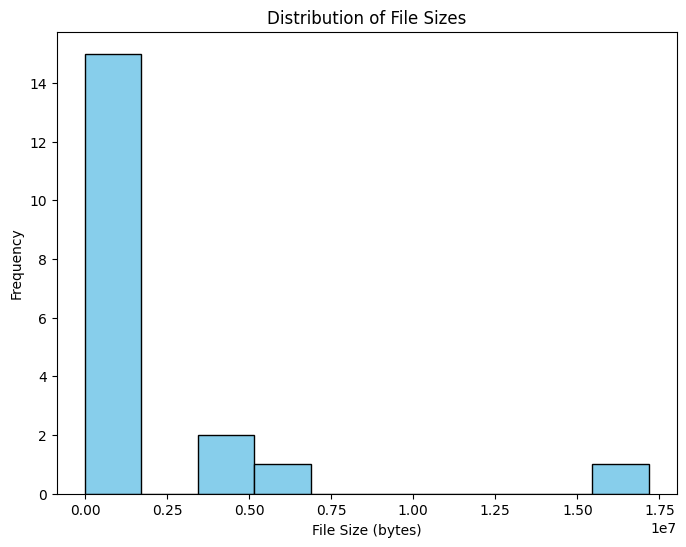


Summary:
The mean file size is 1740011.49 bytes and the median file size is 1157.12 bytes.


In [5]:
# Calculate and display descriptive statistics for 'file_size'
print("Descriptive statistics for 'file_size':\n", df['file_size'].describe())

# Investigate the distribution of 'file_size' using a histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.hist(df['file_size'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of File Sizes')
plt.show()

# Summarize findings
mean_file_size = df['file_size'].mean()
median_file_size = df['file_size'].median()
print(f"\nSummary:\nThe mean file size is {mean_file_size:.2f} bytes and the median file size is {median_file_size:.2f} bytes.")

## Data visualization

### Subtask:
Visualize the distribution of file sizes and explore potential relationships between file size and other relevant variables (if any).


**Reasoning**:
Visualize the distribution of file sizes using a histogram and explore potential relationships with other variables (in this case, just the file size distribution since there are no other relevant columns).



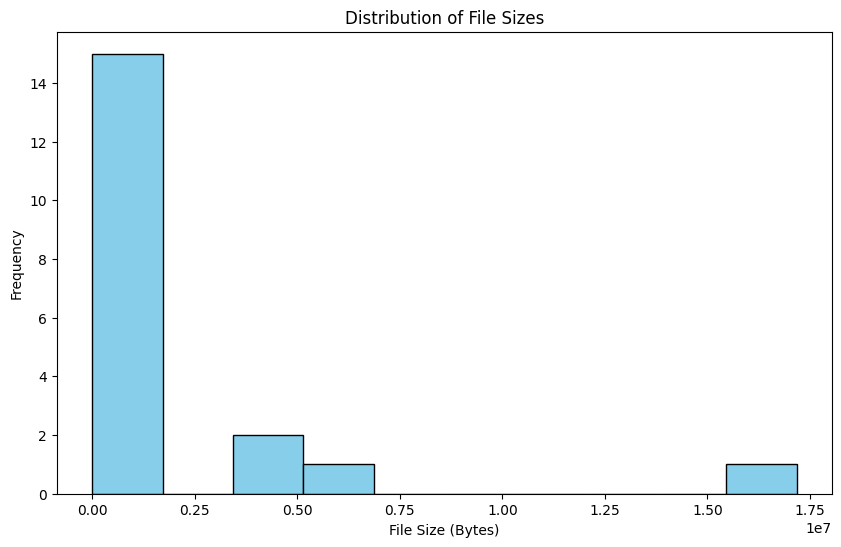

No other relevant columns found for comparison.


In [6]:
import matplotlib.pyplot as plt

# Histogram of file sizes
plt.figure(figsize=(10, 6))
plt.hist(df['file_size'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('File Size (Bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of File Sizes')
plt.show()

print("No other relevant columns found for comparison.")